In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose

In [141]:
df = pd.read_csv('.\\csv_files\\dataframe\\df.csv')

In [142]:
df.columns

Index(['Unnamed: 0', 'Date', 'AAPL', 'AMZN', 'GOOGL', 'INTC', 'META', 'MSFT',
       'NVDA', 'QCOM'],
      dtype='object')

In [143]:
df.drop(columns='Unnamed: 0', inplace=True)

In [144]:
df.head(2)

,Date,AAPL,AMZN,GOOGL,INTC,META,MSFT,NVDA,QCOM
0,2018-01-22,42.077312,66.365501,58.208000,39.829746,185.369995,86.270508,57.833042,59.698547
1,2018-01-23,42.086823,68.126999,58.808498,40.099632,189.350006,86.543610,59.124882,59.411678


In [145]:
df['Date'] = pd.to_datetime(df['Date'])

In [146]:
stocks_name_list = ['AAPL','AMZN','GOOGL','INTC','META','MSFT','NVDA','QCOM']

for stock in stocks_name_list:
    df[f'{stock}'+'_R'] = df[stock].pct_change() .round(4) * 100

In [147]:
df.dropna(inplace=True)

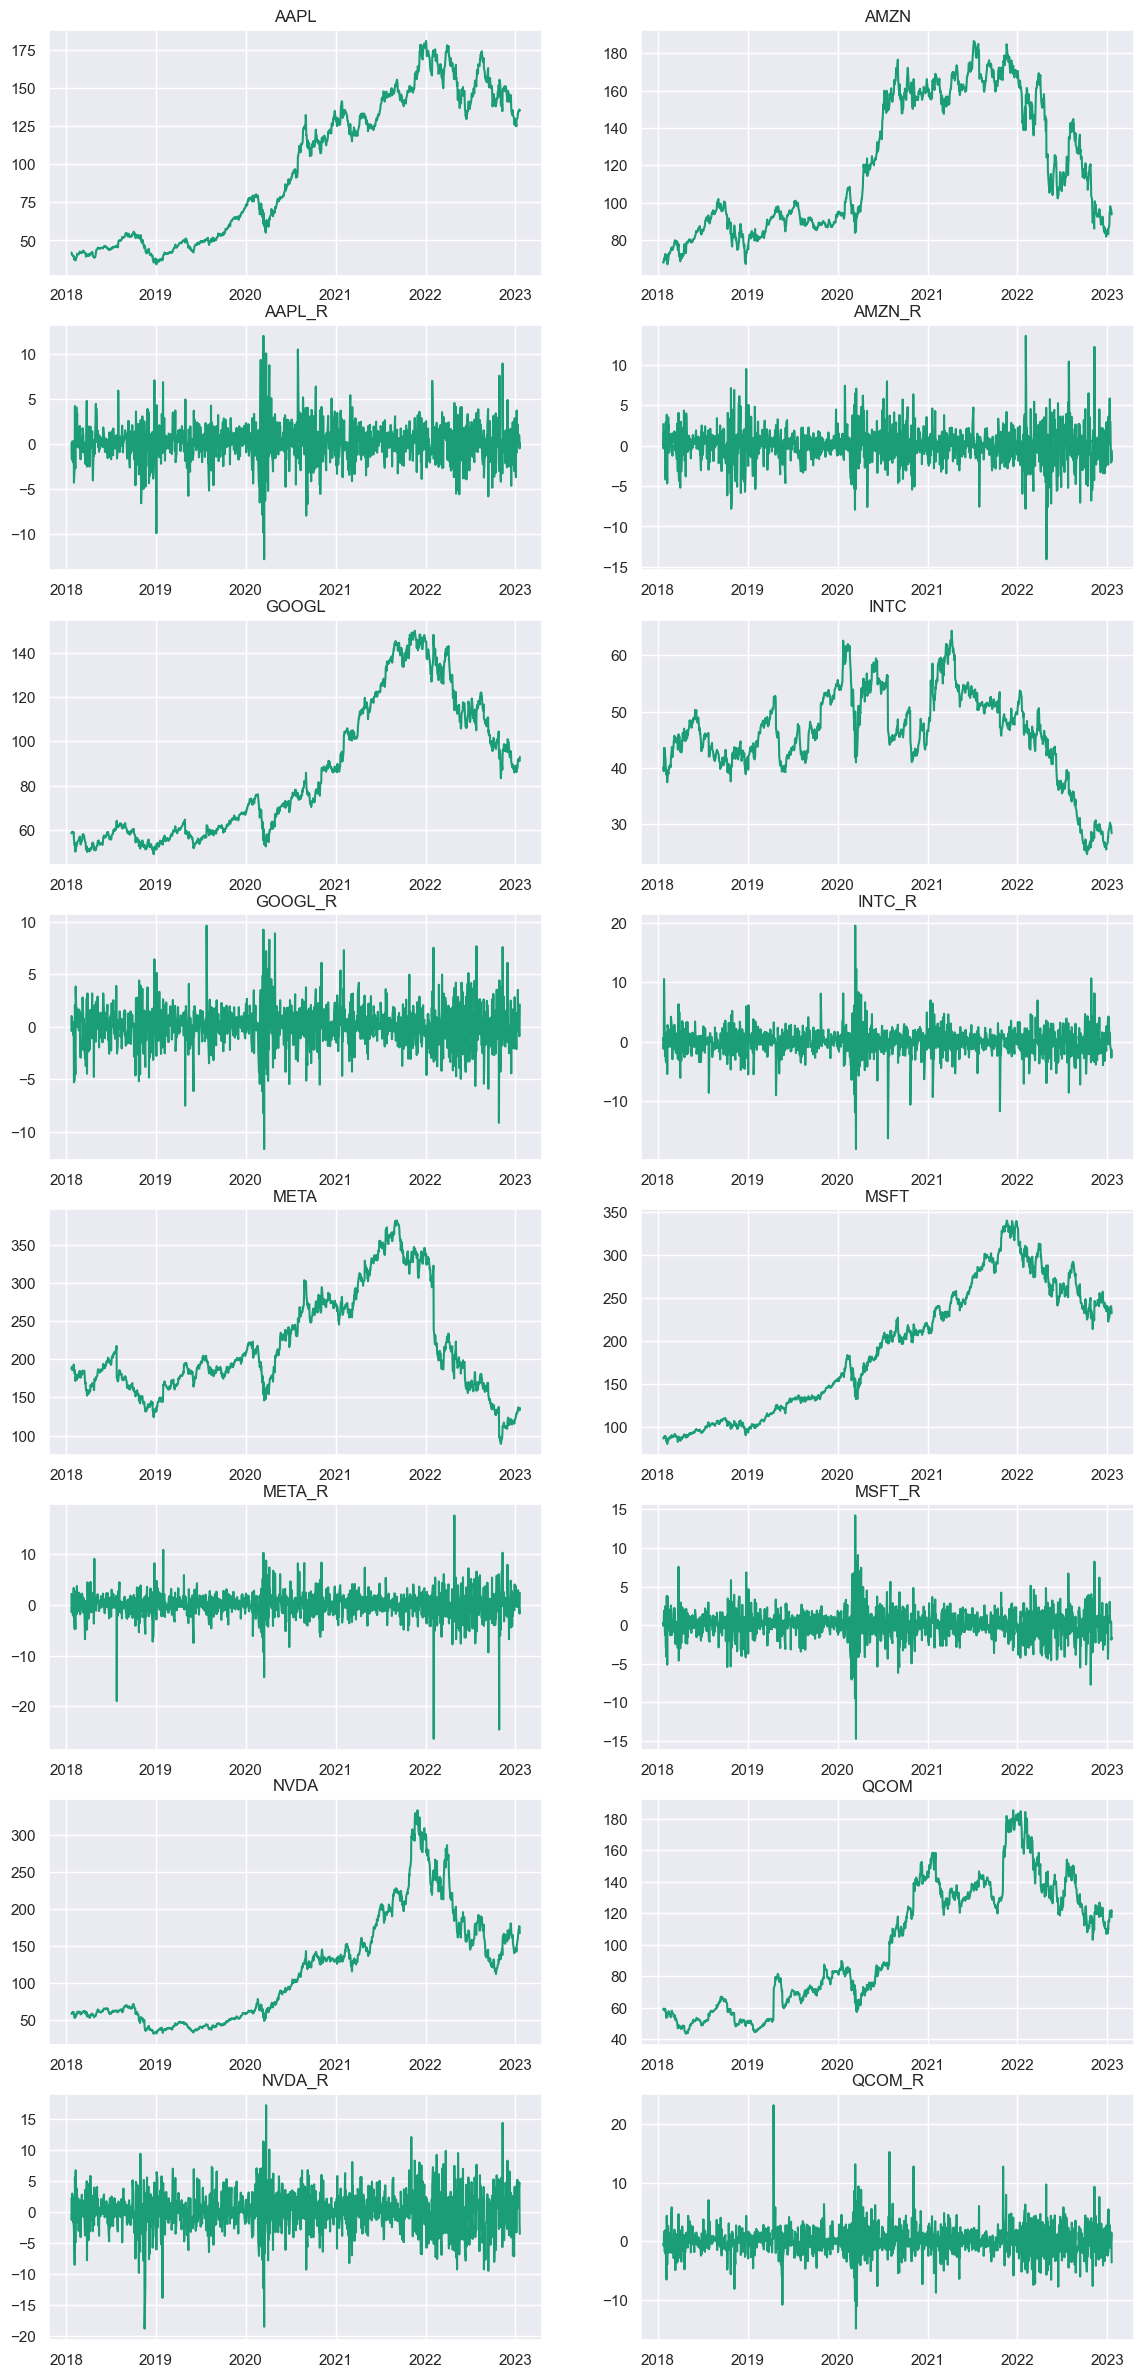

In [148]:
figure, axis = plt.subplots(8, 2, figsize=(14, 30));

axis[0,0].plot(df['Date'], df['AAPL']);
axis[1,0].plot(df['Date'], df['AAPL_R']);
axis[0,1].plot(df['Date'], df['AMZN']);
axis[1,1].plot(df['Date'], df['AMZN_R']);
axis[2,0].plot(df['Date'], df['GOOGL']);
axis[3,0].plot(df['Date'], df['GOOGL_R']);
axis[2,1].plot(df['Date'], df['INTC']);
axis[3,1].plot(df['Date'], df['INTC_R']);
axis[4,0].plot(df['Date'], df['META']);
axis[5,0].plot(df['Date'], df['META_R']);
axis[4,1].plot(df['Date'], df['MSFT']);
axis[5,1].plot(df['Date'], df['MSFT_R']);
axis[6,0].plot(df['Date'], df['NVDA']);
axis[7,0].plot(df['Date'], df['NVDA_R']);
axis[6,1].plot(df['Date'], df['QCOM']);
axis[7,1].plot(df['Date'], df['QCOM_R']);


axis[0,0].set_title('AAPL');
axis[0,1].set_title('AMZN');
axis[2,0].set_title('GOOGL');
axis[2,1].set_title('INTC');
axis[4,0].set_title('META');
axis[4,1].set_title('MSFT');
axis[6,0].set_title('NVDA');
axis[6,1].set_title('QCOM');

axis[1,0].set_title('AAPL_R');
axis[1,1].set_title('AMZN_R');
axis[3,0].set_title('GOOGL_R');
axis[3,1].set_title('INTC_R');
axis[5,0].set_title('META_R');
axis[5,1].set_title('MSFT_R');
axis[7,0].set_title('NVDA_R');
axis[7,1].set_title('QCOM_R');

<AxesSubplot: xlabel='Date', ylabel='value'>

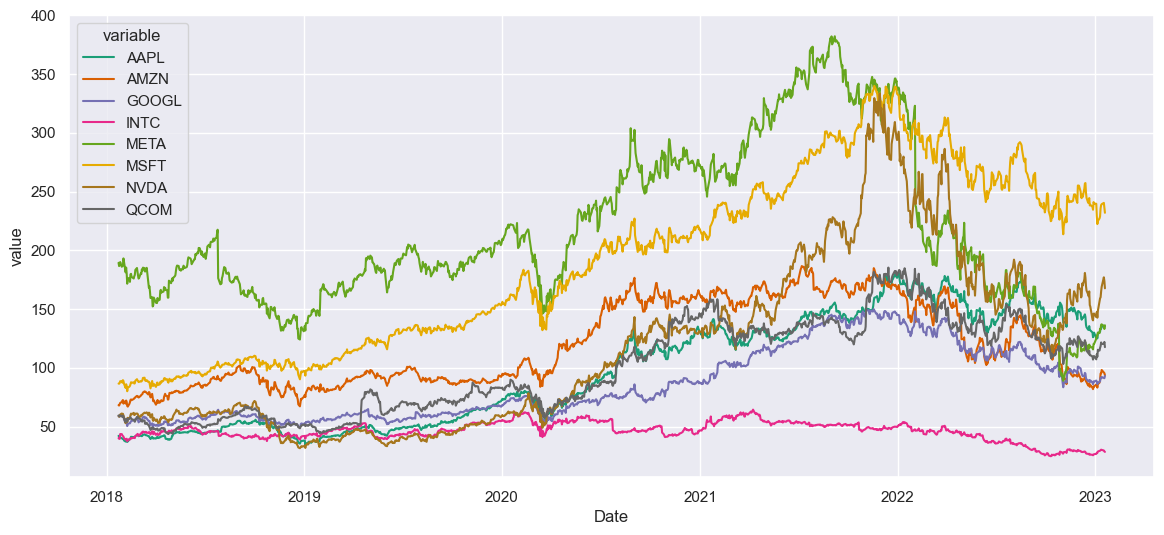

In [149]:
df_melt = df[['Date', 'AAPL','AMZN','GOOGL','INTC','META','MSFT','NVDA','QCOM']].copy()
melt = pd.melt(df_melt, ['Date'])

fig = plt.subplots(figsize=(14, 6))
sns.set(style='darkgrid')
sns.set_palette('Dark2')
sns.lineplot(data= melt, x='Date', y='value', hue='variable')

# First Insights

Between 2018 - 2019,
we can see that the 'dominant'stock was FaceBook (now 'META'), getting the highest price over the other stocks, but with a downward trend in the last 6 months.
Additionally, the others stocks appear to be 'stable', with the exception for Nvidia, wich presents a similar downward pattern as META.

Between 2019 - 2022,
We can see that We can see that all stocks except Intel are in a sustained uptrend. Even with the declaration of the covid emergency, a 'V' recovery pattern is identified, causing the shares to present maximum prices.

Between 2012 - 2023,
The shares presented a correction in their price, however, all the shares managed to establish a floor for the price above 100 USD, except Amazon, Google and Intel.

In [150]:
# Explore Seasonal Decompose for all stocks

In [151]:
#Dispersion and Volatility analysis

In [152]:
df['day_name'] = df['Date'].dt.day_name()

In [153]:
df['month'] = pd.to_datetime((df['Date'].dt.year).astype(str) + '-' + (df['Date'].dt.month).astype(str))

In [154]:
df.head()

,Date,AAPL,AMZN,GOOGL,INTC,META,MSFT,NVDA,QCOM,AAPL_R,AMZN_R,GOOGL_R,INTC_R,META_R,MSFT_R,NVDA_R,QCOM_R,day_name,month
1,2018-01-23,42.086823,68.126999,58.808498,40.099632,189.350006,86.543610,59.124882,59.411678,0.02,2.65,1.03,0.68,2.15,0.32,2.23,-0.48,Tuesday,2018-01-01
2,2018-01-24,41.416443,67.875504,58.564499,39.620796,186.550003,86.468262,58.355228,59.098698,-1.59,-0.37,-0.41,-1.19,-1.48,-0.09,-1.30,-0.53,Wednesday,2018-01-01
3,2018-01-25,40.677113,68.897499,59.106998,39.437981,187.479996,86.948517,58.491337,58.611877,-1.79,1.51,0.93,-0.46,0.50,0.56,0.23,-0.82,Thursday,2018-01-01
4,2018-01-26,40.772190,70.102501,59.377998,43.599419,190.000000,88.577713,60.218735,59.576836,0.23,1.75,0.46,10.55,1.34,1.87,2.95,1.65,Friday,2018-01-01
5,2018-01-29,39.928280,70.884003,59.324001,43.512367,185.979996,88.445862,61.089851,58.524925,-2.07,1.11,-0.09,-0.20,-2.12,-0.15,1.45,-1.77,Monday,2018-01-01
